# get_results_figs.ipynb

This notebook:
* Gets the resulting figures for the embeddings experiments.

In [1]:
# save environment information for each run
import os
import subprocess
import datetime

try:
    import ipynbname
except:
    ! pip install ipynbname
    import ipynbname

result = subprocess.run("conda list", shell=True, capture_output=True, text=True)
with open(f"./env/{ipynbname.name()}-{datetime.datetime.now().strftime('%Y-%m-%d_%H-%M-%S')}.txt", "w") as file:
    file.write(os.environ['CONDA_DEFAULT_ENV'] + "\n")
    file.write(result.stdout)

In [2]:
import pandas as pd

# open, read, and then close file
file = open("./experiment_runs/ablations.py-2024-04-30_13-50-03.txt", "r")
df_list = []
temp_dict = {}
for line in file:
    if "--" in line:
        l = line.replace("--","").split()
        temp_dict = {l[i]: l[i + 1] for i in range(0, len(l), 2)}
    elif "M_wins" in line:
        temp_dict["M_wins"] = line.split()[-1]
    elif "W_wins" in line:
        temp_dict["W_wins"] = line.split()[-1]
        df_list.append(temp_dict)
        temp_dict = {}
    else:
        pass
file.close()

# convert the file information to a pd df
df = pd.DataFrame(df_list)

# set numeric columns
numeric_cols = df.columns.tolist()
numeric_cols.remove("GENDER")
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric)

# filter out 15 seconds
df = df[df["NUM_SECONDS"]!=15.0]

# pd.set_option('display.max_rows', None)
display(df)

,N_SAMPLES,TOP_N,GENDER,NUM_SAMPLES,MIN_SWAPS,NUM_SECONDS,SEED,NUM_API,M_wins,W_wins
5,100,10,male,3,1,20.0,0,3,94,95
6,100,10,male,3,1,20.0,1,3,93,97
7,100,10,male,3,1,20.0,2,3,74,100
8,100,10,male,3,1,20.0,3,3,75,121
9,100,10,male,3,1,20.0,4,3,99,100
...,...,...,...,...,...,...,...,...,...,...
393,100,10,female,3,10,30.0,0,3,5,0
394,100,10,female,3,10,30.0,1,3,6,1
395,100,10,female,3,10,30.0,2,3,5,1
396,100,10,female,3,10,30.0,3,3,8,0


,MIN_SWAPS,GENDER,Men,Women
0,1,female,60.30,39.70
1,1,male,45.24,54.76
2,2,female,63.12,36.88
3,2,male,45.99,54.01
4,3,female,66.41,33.59
5,3,male,43.22,56.78
6,4,female,71.05,28.95
7,4,male,42.39,57.61
8,5,female,74.15,25.85
9,5,male,36.73,63.27


[Text(0, 0, '1'),
 Text(1, 0, '2'),
 Text(2, 0, '3'),
 Text(3, 0, '4'),
 Text(4, 0, '5'),
 Text(5, 0, '6'),
 Text(6, 0, '7'),
 Text(7, 0, '8'),
 Text(8, 0, '9'),
 Text(9, 0, '10')]

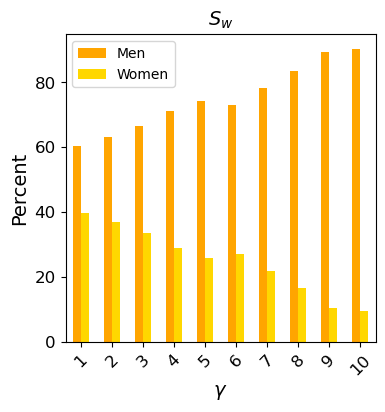

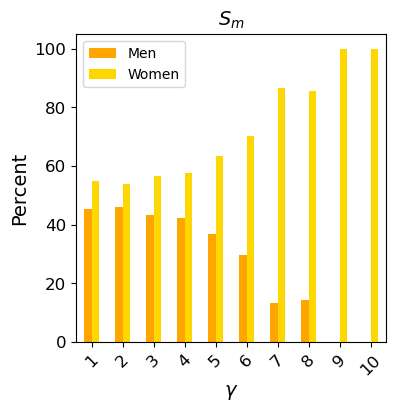

In [3]:
df_result = df[df["NUM_SECONDS"] == 30.0].groupby(["MIN_SWAPS", "GENDER"]).agg({
    "M_wins": "mean",
    "W_wins": "mean"
})
df_result = (df_result.div(df_result.sum(axis=1), axis=0)*100).round(2).reset_index()
df_result = df_result.rename(columns={"M_wins":"Men", "W_wins":"Women"})
display(df_result)

ax = df_result[df_result["GENDER"]=="female"].plot(x="MIN_SWAPS", y=["Men", "Women"], kind="bar", color=["orange","gold"], figsize=(4,4))
ax.legend(loc="upper left")
ax.set_xlabel("$\gamma$", fontsize=14)
ax.set_ylabel("Percent", fontsize=14)
ax.set_title("$S_w$", fontsize=14)
ax.tick_params(axis="both", which="major", labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

ax = df_result[df_result["GENDER"]=="male"].plot(x="MIN_SWAPS", y=["Men", "Women"], kind="bar", color=["orange","gold"], figsize=(4,4))
ax.legend(loc="upper left")
ax.set_xlabel("$\gamma$", fontsize=14)
ax.set_ylabel("Percent", fontsize=14)
ax.set_title("$S_m$", fontsize=14)
ax.tick_params(axis="both", which="major", labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

,GENDER,NUM_SECONDS,Men,Women
0,female,20,60.00,40.00
1,female,25,64.00,36.00
2,female,30,73.03,26.97
3,male,20,44.44,55.56
4,male,25,40.00,60.00
5,male,30,29.63,70.37


[Text(0, 0, '20'), Text(1, 0, '25'), Text(2, 0, '30')]

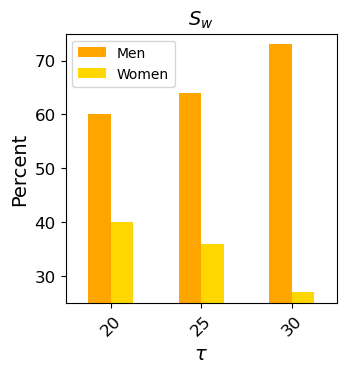

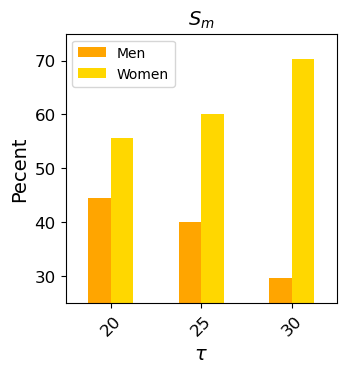

In [4]:
df_result = df[df["MIN_SWAPS"] == 6].groupby(["GENDER", "NUM_SECONDS"]).agg({  #  "NUM_SECONDS", MIN_SWAPS
    "M_wins": "mean",
    "W_wins": "mean"
})

df_result = (df_result.div(df_result.sum(axis=1), axis=0)*100).round(2).reset_index()
df_result = df_result.rename(columns={"M_wins":"Men", "W_wins":"Women"})
df_result["NUM_SECONDS"] = df_result["NUM_SECONDS"].astype(int)
display(df_result)

ax = df_result[df_result["GENDER"]=="female"].plot(x="NUM_SECONDS", y=["Men", "Women"], kind="bar", color=["orange","gold"], figsize=(3.5,3.5), ylim=(25,75))
ax.legend(loc="upper left")
ax.set_xlabel("$\\tau$", fontsize=14)
ax.set_ylabel("Percent", fontsize=14)
ax.set_title("$S_w$", fontsize=14)
ax.tick_params(axis="both", which="major", labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 

ax = df_result[df_result["GENDER"]=="male"].plot(x="NUM_SECONDS", y=["Men", "Women"], kind="bar", color=["orange","gold"], figsize=(3.5,3.5), ylim=(25,75))
ax.legend(loc="upper left")
ax.set_xlabel("$\\tau$", fontsize=14)
ax.set_ylabel("Pecent", fontsize=14)
ax.set_title("$S_m$", fontsize=14)
ax.tick_params(axis="both", which="major", labelsize=12)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45) 